In [85]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv.zip')

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

train_df = pd.read_csv('train.csv.zip')
test_df = pd.read_csv('test.csv.zip')

train_df = train_df.drop(['id', 'timecc'], axis=1)
test_df = test_df.drop(['id', 'timecc'], axis=1)

## Data Analysis

In [87]:
train_df.isnull().mean(0)

win                       0.0
kills                     0.0
deaths                    0.0
assists                   0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
doublekills               0.0
triplekills               0.0
quadrakills               0.0
pentakills                0.0
totdmgdealt               0.0
magicdmgdealt             0.0
physicaldmgdealt          0.0
truedmgdealt              0.0
largestcrit               0.0
totdmgtochamp             0.0
magicdmgtochamp           0.0
physdmgtochamp            0.0
truedmgtochamp            0.0
totheal                   0.0
totunitshealed            0.0
dmgtoturrets              0.0
totdmgtaken               0.0
magicdmgtaken             0.0
physdmgtaken              0.0
truedmgtaken              0.0
wardsplaced               0.0
wardskilled               0.0
firstblood                0.0
dtype: float64

In [88]:
train_df.head()

,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totheal,totunitshealed,dmgtoturrets,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,1,5,2,0,1,569,0,0,0,...,849,2,0,7819,2178,5239,401,4,1,0
1,0,5,8,7,3,1,880,0,0,0,...,642,4,303,24637,5607,17635,1394,10,0,0
2,1,1,6,16,0,1,593,0,0,0,...,2326,3,329,18749,3651,14834,263,7,1,0
3,0,1,2,0,0,1,381,0,0,0,...,1555,1,0,12134,1739,10318,76,8,1,0
4,0,4,11,25,0,1,455,0,0,0,...,6630,8,0,27891,14068,12749,1073,34,2,0


<Axes: xlabel='win'>

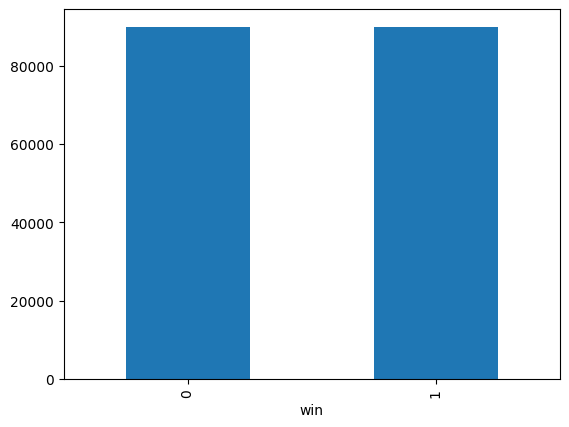

In [89]:
train_df['win'].value_counts().plot(kind='bar')

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in train_df.columns[1:]:
    mean = train_df[column].mean()
    std = train_df[column].std()
    train_df[column] = (train_df[column] - mean) / std
    # train_df[column] /= train_df[column].max()
    test_df[column] = (test_df[column] - mean) / std
    # test_df[column] /= test_df[column].max()

In [91]:
X = train_df.drop("win",axis=1)
y = train_df["win"]

In [92]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(X, test_df, equal_var=False)
print(f"t统计量={t_statistic}, p值={p_value}")

t统计量=[-0.82904796  0.28204526 -0.46896404  0.0819313   0.08723041  0.86683302
 -0.60589323 -0.59504142  0.49460222 -0.70451272 -0.79368818 -0.91981365
  0.18784801 -1.16966521  0.74866694 -0.7176571  -0.89384429  0.16899705
 -1.02688667  0.1366683   0.48548402 -0.96100493  0.22775279 -0.44145172
  0.51683312  0.80049966 -0.08062294 -0.41919708 -1.57752463], p值=[0.40708533 0.77791118 0.63909949 0.93470201 0.93048908 0.38604196
 0.54459125 0.55182125 0.62088526 0.48112029 0.42738465 0.35767912
 0.85099735 0.24214733 0.45406509 0.47297555 0.37141392 0.86580036
 0.30448389 0.8912941  0.6273374  0.33655915 0.81984032 0.65888989
 0.60527729 0.42342903 0.93574248 0.67507577 0.11468777]


In [93]:
from scipy.stats import levene
for col in X.columns:
    statistic, p_value = levene(X[col], test_df[col].T)

    # 输出检验结果
    print(col)
    print("Levene's test statistic:", statistic)
    print("P-value:", p_value)

    # 根据 p-value 判断方差是否显著不同
    alpha = 0.05  # 显著性水平
    if p_value < alpha:
        print("拒绝原假设，方差显著不同")
    else:
        print("接受原假设，方差无显著差异")

kills
Levene's test statistic: 1.2514395563875893
P-value: 0.2632790514574707
接受原假设，方差无显著差异
deaths
Levene's test statistic: 0.40556997891389734
P-value: 0.5242273455728053
接受原假设，方差无显著差异
assists
Levene's test statistic: 0.06454043110651606
P-value: 0.7994586686012266
接受原假设，方差无显著差异
largestkillingspree
Levene's test statistic: 0.3295150163889677
P-value: 0.5659454491614098
接受原假设，方差无显著差异
largestmultikill
Levene's test statistic: 0.00391923005518944
P-value: 0.9500821024359946
接受原假设，方差无显著差异
longesttimespentliving
Levene's test statistic: 0.2566499857206893
P-value: 0.6124316160308731
接受原假设，方差无显著差异
doublekills
Levene's test statistic: 0.3722140945821706
P-value: 0.5418005567386952
接受原假设，方差无显著差异
triplekills
Levene's test statistic: 0.3534252475256555
P-value: 0.5521812279386922
接受原假设，方差无显著差异
quadrakills
Levene's test statistic: 0.22816202622998302
P-value: 0.6328905418557267
接受原假设，方差无显著差异
pentakills
Levene's test statistic: 0.529974308284785
P-value: 0.46661851326581094
接受原假设，方差无显著差异
totdmgde

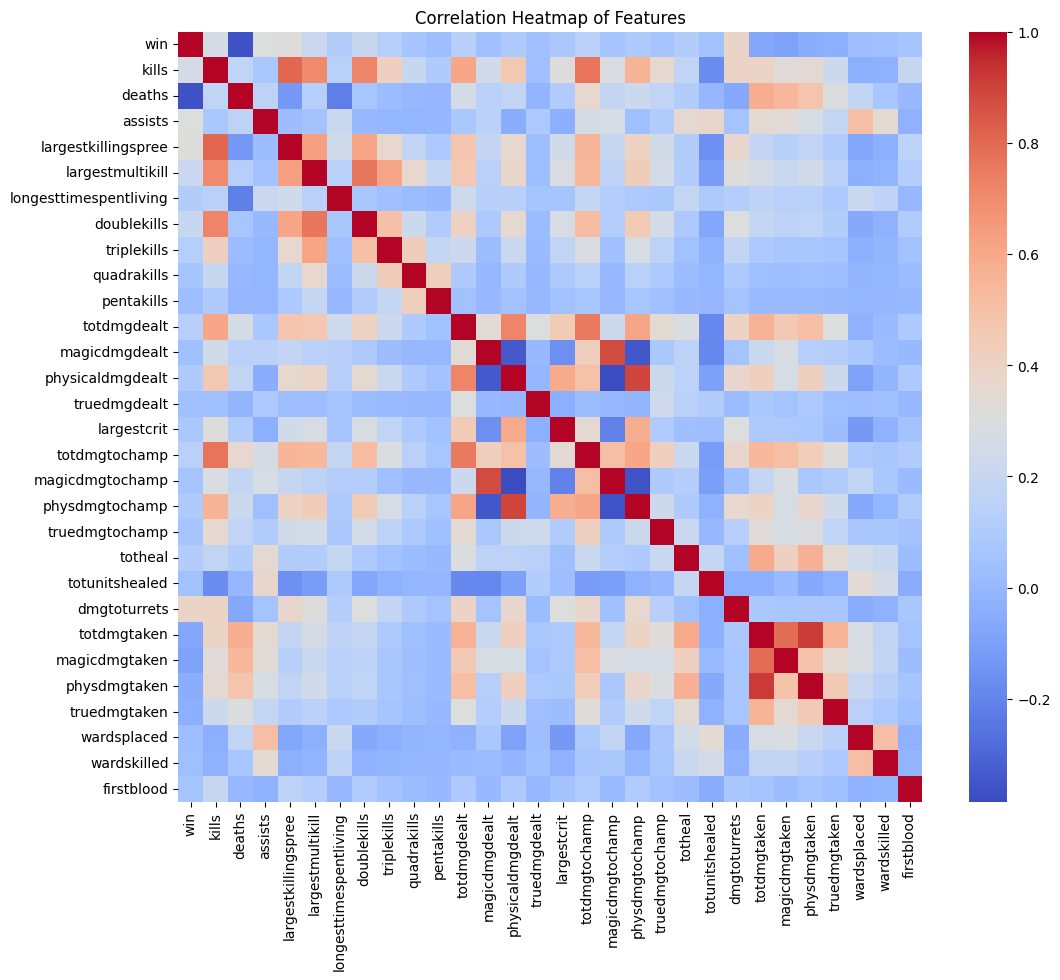

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_df.corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [95]:
X.columns

Index(['kills', 'deaths', 'assists', 'largestkillingspree', 'largestmultikill',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgtoturrets', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

In [96]:
X = X.drop("deaths",axis=1)
X = X.drop("totdmgtaken",axis=1)

test_df = test_df.drop("deaths",axis=1)
test_df = test_df.drop("totdmgtaken",axis=1)

In [67]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=25)
# pca.fit(X)


PCA(n_components=25)

In [68]:
# X = pca.transform(X)
# test_df = pca.transform(test_df)

In [70]:
# columns = [f'{i}' for i in range(25)]
# X = pd.DataFrame(X,columns=columns)
# test_df = pd.DataFrame(test_df,columns=columns)

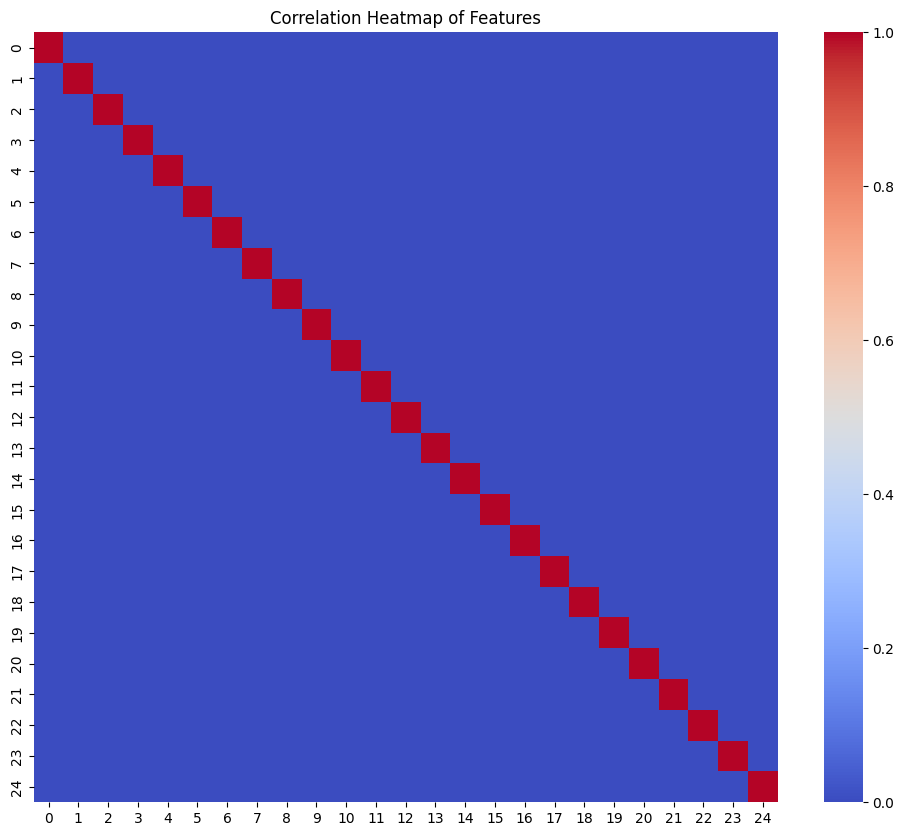

In [71]:
# correlation_matrix = X.corr()

# # 绘制热力图
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Features')
# plt.show()

## Model training

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 500, 700],
    # 'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [ 5, 7, 9],
    # 'reg_alpha': [0.05,0.1,0.3],
    # "reg_lambda": [0.2,0.3,0.5],
    "min_child_weight": [7, 9, 11],
}

In [139]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    device = "cuda",
    learning_rate = 0.1,
    n_estimators = 700,
    max_depth = 5,
    reg_alpha = 0.1,
    reg_lambda = 0.2,
    min_child_weight = 11,
                                              )

xgb_model.fit(X, y)
best_model = xgb_model

In [24]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1,refit=True)
grid_search.fit(X_train, y_train)

# 输出最佳参数组合和对应的评分
print("最佳参数组合:", grid_search.best_params_)
print("最佳模型评分:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
最佳参数组合: {'max_depth': 5, 'min_child_weight': 11, 'n_estimators': 700}
最佳模型评分: 0.8374791666666667


In [137]:
# best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8436944444444444


In [76]:
y_pred = xgb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8728958333333333


In [140]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(
    # device="gpu",
    boosting_type='dart', 
    num_leaves=40, 
    learning_rate=0.1, 
    n_estimators=700,
    reg_alpha = 0.1,
    reg_lambda = 0.1,
    n_jobs = -1,
    )
clf.fit(X, y, eval_set=[(X_test, y_test)], eval_metric='binary_error',)
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

[LightGBM] [Info] Number of positive: 89991, number of negative: 90009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4137
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499950 -> initscore=-0.000200
[LightGBM] [Info] Start training from score -0.000200
Accuracy: 0.8661944444444445
Accuracy: 0.8643819444444445


In [150]:
from catboost import CatBoostClassifier,Pool
cat_model = CatBoostClassifier(iterations=800,  # 迭代次数
                           learning_rate=0.25,  # 学习率
                           depth=5,
                           l2_leaf_reg = 2,
                           min_data_in_leaf = 5,
                           task_type = "GPU")  # 树的最大深度


In [ ]:
train_pool = Pool(data = X,label = y)
grid = {
        # "learning_rate":[0.1,0.5,1],
        # "depth":[4,6,8],
        # "l2_leaf_reg":[1,3,5],
        "min_data_in_leaf":[3,5,7],
        }
grid_search_result = cat_model.grid_search(grid, train_pool, verbose=True)
# 输出最优参数组合
print(grid_search_result['params'])




0:	learn: 0.4754635	test: 0.4773199	best: 0.4773199 (0)	total: 145ms	remaining: 28.9s
1:	learn: 0.4195674	test: 0.4225483	best: 0.4225483 (1)	total: 268ms	remaining: 26.6s
2:	learn: 0.3921601	test: 0.3961016	best: 0.3961016 (2)	total: 386ms	remaining: 25.4s
3:	learn: 0.3776631	test: 0.3816528	best: 0.3816528 (3)	total: 504ms	remaining: 24.7s
4:	learn: 0.3667847	test: 0.3715759	best: 0.3715759 (4)	total: 633ms	remaining: 24.7s
5:	learn: 0.3595901	test: 0.3650625	best: 0.3650625 (5)	total: 789ms	remaining: 25.5s
6:	learn: 0.3551306	test: 0.3607030	best: 0.3607030 (6)	total: 909ms	remaining: 25.1s
7:	learn: 0.3508529	test: 0.3564700	best: 0.3564700 (7)	total: 1.02s	remaining: 24.5s
8:	learn: 0.3479767	test: 0.3539282	best: 0.3539282 (8)	total: 1.13s	remaining: 24s
9:	learn: 0.3454856	test: 0.3520759	best: 0.3520759 (9)	total: 1.25s	remaining: 23.7s
10:	learn: 0.3417396	test: 0.3484940	best: 0.3484940 (10)	total: 1.36s	remaining: 23.3s
11:	learn: 0.3395739	test: 0.3470581	best: 0.3470581 (

In [ ]:
print(grid_search_result)

{'params': {'l2_leaf_reg': 3}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 'test-Logloss-mean':

In [148]:
cat_model.fit(X_train, y_train)

0:	learn: 0.6062445	total: 7.61ms	remaining: 11.4s
1:	learn: 0.5564718	total: 14.8ms	remaining: 11.1s
2:	learn: 0.5252772	total: 21.7ms	remaining: 10.8s
3:	learn: 0.5041780	total: 28.7ms	remaining: 10.7s
4:	learn: 0.4869980	total: 36.5ms	remaining: 10.9s
5:	learn: 0.4773410	total: 43.4ms	remaining: 10.8s
6:	learn: 0.4672444	total: 50.7ms	remaining: 10.8s
7:	learn: 0.4592993	total: 57.3ms	remaining: 10.7s
8:	learn: 0.4522751	total: 64.2ms	remaining: 10.6s
9:	learn: 0.4459722	total: 71ms	remaining: 10.6s
10:	learn: 0.4394046	total: 77.8ms	remaining: 10.5s
11:	learn: 0.4335827	total: 84.8ms	remaining: 10.5s
12:	learn: 0.4295192	total: 92.2ms	remaining: 10.5s
13:	learn: 0.4262894	total: 99.2ms	remaining: 10.5s
14:	learn: 0.4219282	total: 106ms	remaining: 10.5s
15:	learn: 0.4183897	total: 113ms	remaining: 10.4s
16:	learn: 0.4156594	total: 120ms	remaining: 10.4s
17:	learn: 0.4134018	total: 127ms	remaining: 10.5s
18:	learn: 0.4113043	total: 134ms	remaining: 10.4s
19:	learn: 0.4085049	total: 1

In [151]:
cat_model.fit(X,y)

0:	learn: 0.6088875	total: 7.94ms	remaining: 6.34s
1:	learn: 0.5613233	total: 15.4ms	remaining: 6.13s
2:	learn: 0.5281006	total: 22.6ms	remaining: 6.01s
3:	learn: 0.5044292	total: 30.2ms	remaining: 6s
4:	learn: 0.4891501	total: 38.6ms	remaining: 6.14s
5:	learn: 0.4773655	total: 46.2ms	remaining: 6.11s
6:	learn: 0.4675340	total: 53.5ms	remaining: 6.06s
7:	learn: 0.4604168	total: 61.3ms	remaining: 6.07s
8:	learn: 0.4534070	total: 70.7ms	remaining: 6.22s
9:	learn: 0.4472140	total: 79.7ms	remaining: 6.3s
10:	learn: 0.4417625	total: 87.5ms	remaining: 6.28s
11:	learn: 0.4374888	total: 95.6ms	remaining: 6.28s
12:	learn: 0.4327694	total: 105ms	remaining: 6.33s
13:	learn: 0.4284832	total: 113ms	remaining: 6.32s
14:	learn: 0.4255625	total: 121ms	remaining: 6.34s
15:	learn: 0.4225474	total: 130ms	remaining: 6.36s
16:	learn: 0.4189668	total: 139ms	remaining: 6.38s
17:	learn: 0.4159776	total: 150ms	remaining: 6.5s
18:	learn: 0.4137454	total: 157ms	remaining: 6.47s
19:	learn: 0.4110332	total: 165ms	

In [125]:
y_pred = cat_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9314166666666667


In [149]:
y_pred = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8439444444444445


In [156]:
y_pred1 = cat_model.predict(test_df)
y_pred2 = best_model.predict(test_df)
y_pred3 = clf.predict(test_df)
test_predict = ((y_pred1+y_pred2+y_pred3) > 1).astype(int)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")

In [157]:
# test_predict = xgb_model.predict(test_df)
print(test_predict.shape)
pd.DataFrame({'win':
              test_predict
             }).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

(20000,)
updating: submission.csv (deflated 90%)


tensor([0., 1.])

1